Цель: научится применять модели линейной регресси библиотеки scikit-learn к набору эмпирических данных

Дано: сsv-файл

Результат: эмпирическая формула

Ход выполнения: 
1. Загрузить данные из файла.
2. Визуализировать загруженные данные (диаграмма рассеяния, график).
3. Разбить данные на обучающую и тестовую выборки.
4. Выбрать модель регрессии.
5. Обучить модель регрессии на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.

1. Загрузить данные из файла.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt

f = '../../../tasks/lab1/dataset/lab1-01.csv'

data = pd.read_csv(f, header=None, names=['x', 'y'])
data

,x,y
0,1.040404,-205.789979
1,4.555556,-1933.310618
2,2.414141,-1075.586885
3,3.101010,-889.283808
4,1.929293,114.306301
...,...,...
195,2.292929,-1839.952732
196,5.727273,-1290.477030
197,5.848485,-1695.142646
198,1.404040,-354.121910


2. Визуализировать загруженные данные (диаграмма рассеяния, график).

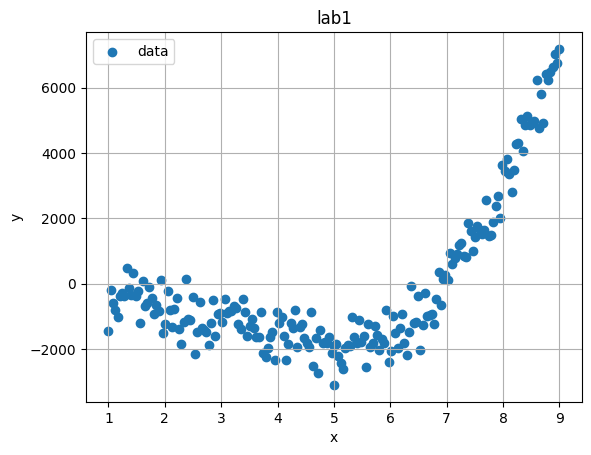

In [2]:
plt.scatter(data.x, data.y, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('lab1')
plt.grid(True)
plt.show()

3. Разбить данные на обучающую и тестовую выборки.

In [3]:
data.insert(0, 'x_2', data.x**2)
data.insert(0, 'x_3', data.x**3)
df = data
data = data.to_numpy()

data_tr, data_t = sk.model_selection.train_test_split(
    data, test_size=0.3, random_state=0)

X_tr = data_tr[:, :-1]
y_tr = data_tr[:, -1]
X_t = data_t[:, :-1]
y_t = data_t[:, -1]

4. Выбрать модель регрессии.

In [4]:
model = linear_model.LinearRegression()

5. Обучить модель регрессии на обучающих данных.

In [5]:
model.fit(X_tr, y_tr)

LinearRegression()

6. Проверить качество полученной модели на тестовых данных.

In [6]:
print('R^2 test: ', model.score(X_t, y_t))
print('RMSE test: ', ((model.predict(X_t) - y_t)**2).sum()**0.5)

R^2 test:  0.9508364579002104
RMSE test:  3931.9024389881324


7. Визуализировать результат.

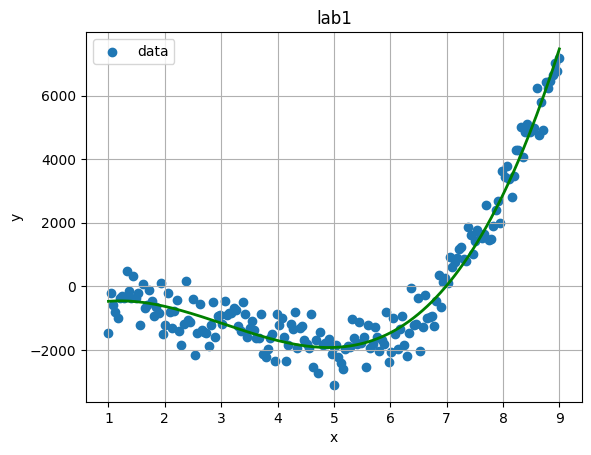

In [7]:
plt.scatter(df.x, df.y, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('lab1')
plt.grid(True)

cur_y = model.predict(df.drop(['y'], axis=1).to_numpy())
df.insert(0, 'pred', cur_y)
df.sort_values('x', inplace=True)
plt.plot(df.x, df.pred, label='predicted', color='green', linewidth=2)
plt.show()

In [9]:
print(model.coef_, model.intercept_)

[  58.14677906 -533.21353794 1033.88914737] -1032.8063727181482


# Конечная формула
$y = 58.14677906 \cdot x^3 - 533.21353794 \cdot x^2 + 1033.88914737 \cdot x - 1032.8063727181482$